In this notebook, I will develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, I will generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>1</b> and the values in <b>y</b> such that: 
<b>yi = 5*xi + b (b is distributed between 0 and 1)</b>


In [31]:
X = np.random.rand(50)
X

array([0.25663973, 0.37822399, 0.81956664, 0.8857577 , 0.88001772,
       0.55500564, 0.27010191, 0.182849  , 0.5496397 , 0.03781412,
       0.19756684, 0.55155936, 0.72991173, 0.48374649, 0.49613852,
       0.45314126, 0.80227422, 0.16070136, 0.99970218, 0.71940999,
       0.75011359, 0.50520915, 0.18307972, 0.65807676, 0.53259492,
       0.2731729 , 0.43724391, 0.16421905, 0.8574565 , 0.04299498,
       0.53859269, 0.84816261, 0.84078189, 0.96997624, 0.07562522,
       0.33383132, 0.49506231, 0.94879111, 0.23059693, 0.53910794,
       0.22869412, 0.19927554, 0.51349641, 0.8789298 , 0.39110933,
       0.90164454, 0.17939374, 0.35736303, 0.03363756, 0.96459159])

In [32]:
y = 5*X + np.random.rand(50)
y

array([2.24490622, 2.17428188, 5.05793116, 5.00555452, 5.11915272,
       3.27616413, 2.07221032, 1.18236704, 3.17188955, 0.50189982,
       1.57214598, 3.40964367, 3.75041829, 3.14715793, 2.60231074,
       2.63467726, 4.65426989, 1.36175856, 5.88344498, 4.33687721,
       4.36254904, 2.65689891, 1.82065513, 4.1387754 , 3.26415912,
       1.70580269, 3.14722599, 1.19618991, 4.4568653 , 0.73825544,
       3.66621391, 4.48368297, 4.67271169, 5.23070399, 0.73886033,
       2.44601391, 3.3007303 , 5.06792417, 1.61023511, 3.05694102,
       2.09939296, 1.6119337 , 2.94640271, 5.21080467, 2.55590148,
       5.44863728, 1.59298646, 1.83114409, 0.309699  , 5.78767389])

#### Plot your data points. 

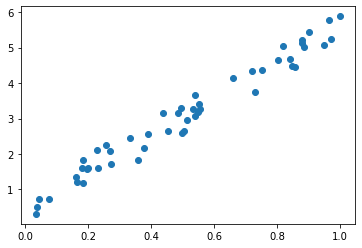

In [33]:
plt.scatter(X, y)

## 1- Momentum-Based GD
### Here, I will implement Momentum-Based GD.

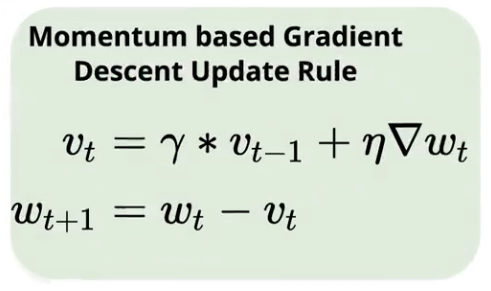

#### $\gamma$ takes values between 0 and 1.
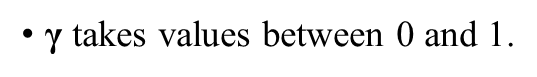

In [48]:
def momentum_GD(X, y, alpha, gamma, max_iterations):
    m = len(X)
    # Empty list to store the cost for every iteration in.
    all_costs = []
    # Empty list to store the weights for every iteration in.
    all_thetas = []
    # Start with an initial guess that the weights are zeros.
    theta = np.zeros(2)
    # let vt0 and vt1 start with 0
    vt0, vt1 = 0, 0
    for i in range(max_iterations):  
        # predict the output and calculate the error.      
        h = X*theta[1] + theta[0]
        error = h - y
        
        # calculate the cost store it in the 'all_costs' list
        cost = np.sum(np.power(error, 2)) / (2 * m)
        all_costs.append(cost)

        # calculate the gradient for each weight and update them.
        # note: here the update won't be with the gradient only,
        # it will be the gradient + the history from the previous iterations(vt).
        gradient0 = (1/ m) * np.sum(error)
        vt0 = gamma*vt0 + alpha*gradient0
        theta[0] = theta[0] - vt0

        gradient1 = (1/ m) * np.sum(error*X)
        vt1 = gamma*vt1 + alpha*gradient1
        theta[1] = theta[1] - vt1

        # store the weights in the 'all_thetas' list
        all_thetas.append(theta.copy())
    
        # here is the stop condition. if the gradient or the change in the cost become very small, 
        # then no need to complete the maximum iteration.
        gradient = np.linalg.norm((gradient0, gradient1), 2)
        cost_change = (all_costs[i-1] - all_costs[i])

        if gradient < 0.01 or (i > 1 and cost_change < 0.0001):
            print(f'it only took {i} iterations')
            break
            
    return all_costs, theta, all_thetas


#### Try the function with any input parameters.

In [49]:
alpha = 0.01
gamma = 0.8
max_iterations = 10000
all_costs, theta, all_thetas = momentum_GD(X, y, alpha, gamma, max_iterations)

it only took 561 iterations


#### now we have the trained weights and can calculate the most likely predicted output and calculate the accuracy (using r2_score).

In [50]:
y_pred = theta[0] + theta[1]*X

from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9559304248404346

Text(0.5, 1.0, 'cost vs. epochs')

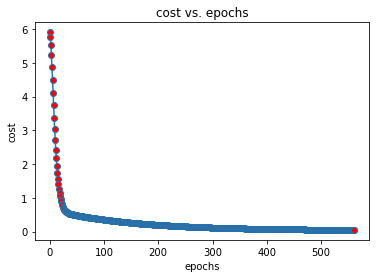

In [51]:
plt.plot(np.arange(len(all_costs)), all_costs, marker='o', markerfacecolor='r')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('cost vs. epochs')

Text(0.5, 1.0, 'theta 0 vs. cost')

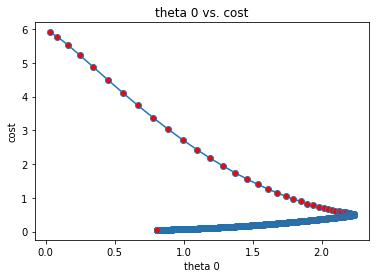

In [52]:
all_thetas = np.array(all_thetas)
plt.plot(all_thetas[:,0], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 0')
plt.ylabel('cost')
plt.title('theta 0 vs. cost')

Text(0.5, 1.0, 'theta 1 vs. cost')

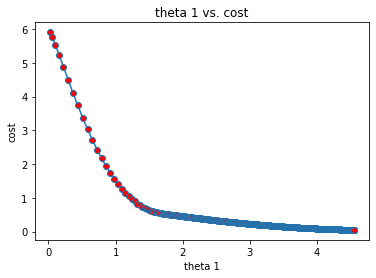

In [53]:
plt.plot(all_thetas[:,1], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 1')
plt.ylabel('cost')
plt.title('theta 1 vs. cost')

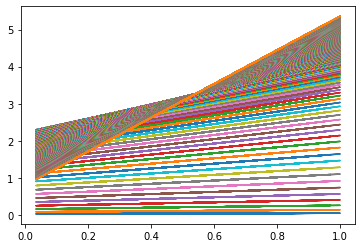

In [54]:
for th in all_thetas:
    y_pred = th[0] + th[1] * X
    plt.plot(X, y_pred)
plt.show()

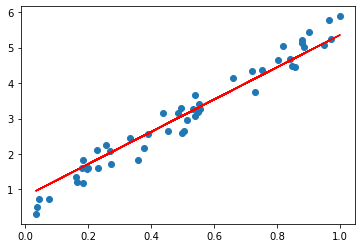

In [55]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r')

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [88]:
alpha = 0.01
gamma = 0.9
max_iterations = 10000
all_costs, theta, all_thetas = momentum_GD(X, y, alpha, gamma, max_iterations)

it only took 21 iterations


In [89]:
y_pred = theta[0] + theta[1]*X

# calculate r2 score
r2_score(y, y_pred)

0.4868221733535433

Text(0.5, 1.0, 'cost vs. epochs')

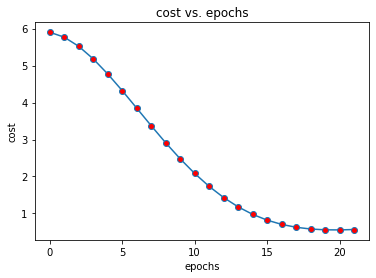

In [90]:
plt.plot(np.arange(len(all_costs)), all_costs, marker='o', markerfacecolor='r')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('cost vs. epochs')

Text(0.5, 1.0, 'theta 0 vs. cost')

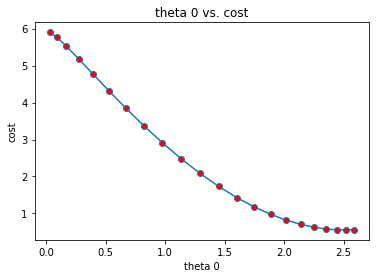

In [91]:
all_thetas = np.array(all_thetas)
plt.plot(all_thetas[:,0], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 0')
plt.ylabel('cost')
plt.title('theta 0 vs. cost')

Text(0.5, 1.0, 'theta 1 vs. cost')

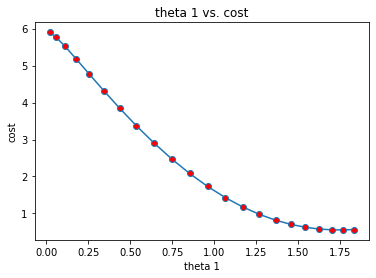

In [92]:
plt.plot(all_thetas[:,1], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 1')
plt.ylabel('cost')
plt.title('theta 1 vs. cost')

In [93]:
alpha = 0.01
gamma = 0.1
max_iterations = 10000
all_costs, theta, all_thetas = momentum_GD(X, y, alpha, gamma, max_iterations)

it only took 1495 iterations


In [94]:
y_pred = theta[0] + theta[1]*X

# calculate r2 score
r2_score(y, y_pred)

0.908825426272029

Text(0.5, 1.0, 'cost vs. epochs')

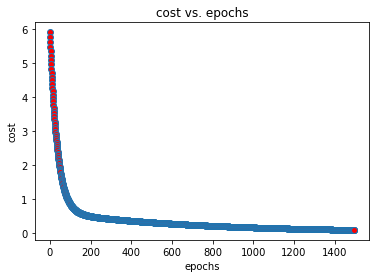

In [95]:
plt.plot(np.arange(len(all_costs)), all_costs, marker='o', markerfacecolor='r')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('cost vs. epochs')

Text(0.5, 1.0, 'theta 0 vs. cost')

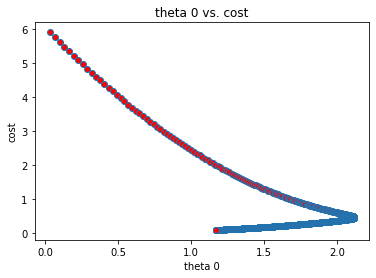

In [96]:
all_thetas = np.array(all_thetas)
plt.plot(all_thetas[:,0], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 0')
plt.ylabel('cost')
plt.title('theta 0 vs. cost')

Text(0.5, 1.0, 'theta 1 vs. cost')

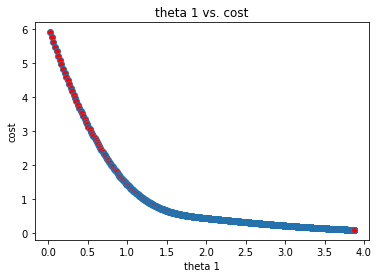

In [97]:
plt.plot(all_thetas[:,1], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 1')
plt.ylabel('cost')
plt.title('theta 1 vs. cost')

**Note: when I use large value of gamma, the step becomes also large. and when I use small value of gamma, the step becomes also small. that is because the value of gamma tells how many I depend on the history, when gamma is large this meaning that I strongly depend on the history then the step become big, and when it's small this meaning that I weakly depend in the history then the step become small.**

# 2- Nesterov Accelerated  Gradient Descent (NAG)
### Now, I will implement the Nesterov Accelerated  Gradient Descent (NAG).

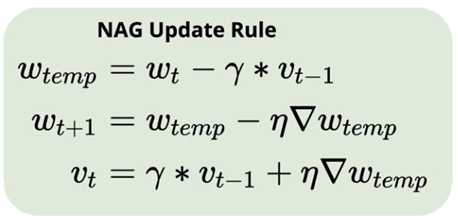

In [103]:
def Nesterov_GD(X, y, alpha, gamma, max_iterations):
    m = len(X)
    # Empty list to store the cost for every iteration in.
    all_costs = []
    # Empty list to store the weights for every iteration in.
    all_thetas = []
    # Start with an initial guess that the weights are zeros.
    theta = np.zeros(2)
    # let vt0 and vt1 start with 0
    vt0, vt1 = 0, 0
    for i in range(max_iterations):
        # here we will update with the history first, and then update again with the gradient
        # of the point that the first update reached.
        thetaTemp0 = theta[0] - gamma*vt0
        thetaTemp1 = theta[1] - gamma*vt1
        
        # predict the output and calculate the error.
        h = X*thetaTemp1 + thetaTemp0
        error = h - y
        
        # calculate the gradient at the point that the history reached for each weight and update again with gradient.
        gradient0 = (1/m) * np.sum(error)
        theta[0] = thetaTemp0 - alpha*gradient0
        vt0 = gamma*vt0 + alpha*gradient0
        
        gradient1 = (1/m) * np.sum((error)*X)
        theta[1] = theta[1] - alpha*gradient1
        vt1 = gamma*vt1 + alpha*gradient1

        # calculate the cost store it in the 'all_costs' list
        cost = np.sum(np.power((error), 2)) / (2*m)
        all_costs.append(cost)
        
        # store the weights in the 'all_thetas' list
        all_thetas.append(theta.copy())

        # here is the stop condition. if the gradient or the change in the cost become very small, 
        # then no need to complete the maximum iteration.
        gradient = np.linalg.norm((gradient0, gradient1), 2)
        cost_change = (all_costs[i-1] - all_costs[i])

        if gradient < 0.001 or (i > 1 and abs(cost_change) < 0.0001):
            print(f'it only took {i} iterations')
            break
            
    return all_costs, theta, all_thetas

In [108]:
alpha = 0.01
gamma = 0.8
max_iterations = 10000
all_costs, theta, all_thetas = Nesterov_GD(X, y, alpha, gamma, max_iterations)

it only took 1730 iterations


In [109]:
y_pred = theta[0] + theta[1]*X

# calculate r2 score
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9133025309174209

Text(0.5, 1.0, 'cost vs. epochs')

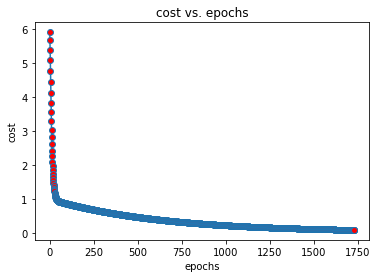

In [110]:
plt.plot(np.arange(len(all_costs)), all_costs, marker='o', markerfacecolor='r')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('cost vs. epochs')

Text(0.5, 1.0, 'theta 0 vs. cost')

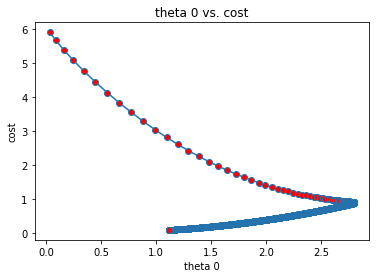

In [111]:
all_thetas = np.array(all_thetas)
plt.plot(all_thetas[:,0], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 0')
plt.ylabel('cost')
plt.title('theta 0 vs. cost')

Text(0.5, 1.0, 'theta 1 vs. cost')

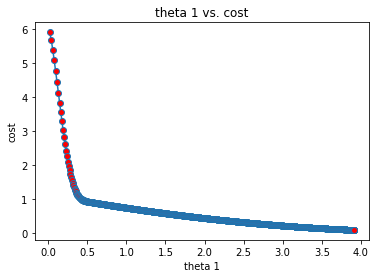

In [112]:
plt.plot(all_thetas[:,1], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 1')
plt.ylabel('cost')
plt.title('theta 1 vs. cost')

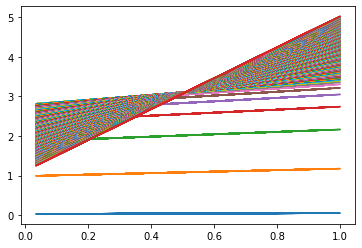

In [117]:
for i in range(0, len(all_thetas), 10):
    h = all_thetas[i][0] + X*all_thetas[i][1]
    plt.plot(X, h)
plt.show()

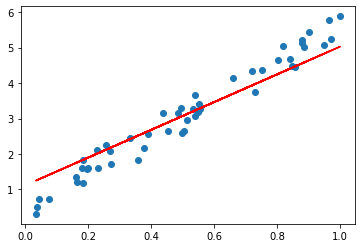

In [114]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r')

**Nesterov Accelerated Gradient Descent is just an update on  Momentum Gradient Descent to reduce the step of updating the weights. so we saw with the same hyperparameters as Momentum, the Nesterov take more iterations because the step becomes less**